In [550]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/diamond --filename=out.log --output=../data/diamond-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/diamond --filename=out.log --output=../data/diamond-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/diamond --filename=out.log --output=../data/diamond-ref-kpts.json

In [551]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

d = load_data('../data/diamond-klno.json')
data_diamond_klno = d[d['method'] == 'fftisdf-60-14']

d = load_data('../data/diamond-k-sos-mp2.json')
data_diamond_k_sos_mp2 = d[d['method'] == 'fftisdf-60-14']

In [552]:
# plot all the results
nkpt = data_diamond_klno['nkpt'].unique()
nkpt.sort()
nkpt = nkpt[0:-1]

for nk in nkpt:
    colors = ['r', 'g', 'b']
    label = ['e_corr_klno_corr_os', 'e_corr_klno_corr_mp2', 'e_corr_klno_corr_ccsd', 'e_corr_klno_corr_ccsd_t']
    cols = data_diamond_klno[data_diamond_klno['nkpt'] == nk][label]
    x0 = data_diamond_k_sos_mp2[data_diamond_k_sos_mp2['nkpt'] == nk]['ene_os_lt30'].item()

    # print(f"nkpt: {nk}")
    cols = cols[cols != 0]
    # delete NaN
    cols = cols.dropna()
    # sort by e_corr_klno_corr_os
    cols = cols.sort_values('e_corr_klno_corr_os')


    import matplotlib.pyplot as plt
    # fig, ax = plt.subplots()

    ene_krhf = data_diamond_klno[data_diamond_klno['nkpt'] == nk]['ene_krhf'].values[0]
    out = "nk = %4d, ene_krhf = %12.8f, ene_sos_mp2 = %12.8f" % (nk, ene_krhf, ene_krhf + x0 * 1.3)
    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os']
        y = cols[l]
        # delete repeated values
        x = x.drop_duplicates()
        y = y.drop_duplicates()
        # print(x)
        # print(y)
        
        import numpy, scipy
        from scipy.optimize import curve_fit

        r = numpy.polyfit(x[:4], y[:4], 1)
        p = numpy.poly1d(r)
        y0 = p(x0)

        # ax.scatter(x, y, c=colors[il], label=l)
        # xmin = min(x.min(), x0)
        # xmax = max(x.max(), x0)
        # x = numpy.linspace(xmin, xmax, 100)
        # y = p(x)
        # ax.plot(x, y, color=colors[il], linestyle='--', marker='')
        # ax.scatter([x0], [y0], c=colors[il], label=l, marker='x')

        # ax.legend()
        
        name = "ene_" + l.split('e_corr_klno_corr_')[-1]
        out += f", {name} = {y0 + ene_krhf:12.8f}"

    print(out)



nk =    2, ene_krhf = -10.57682410, ene_sos_mp2 = -10.79326588, ene_mp2 = -10.79452719, ene_ccsd = -10.82225104, ene_ccsd_t = -10.83177546
nk =    4, ene_krhf = -10.82926354, ene_sos_mp2 = -11.05036103, ene_mp2 = -11.05833377, ene_ccsd = -11.07571564, ene_ccsd_t = -11.08613059
nk =    8, ene_krhf = -10.95722433, ene_sos_mp2 = -11.17958906, ene_mp2 = -11.19200287, ene_ccsd = -11.20458476, ene_ccsd_t = -11.21548141
nk =   12, ene_krhf = -10.99956058, ene_sos_mp2 = -11.22787028, ene_mp2 = -11.24524921, ene_ccsd = -11.25264136, ene_ccsd_t = -11.26484410
nk =   18, ene_krhf = -11.02151491, ene_sos_mp2 = -11.25340190, ene_mp2 = -11.27276473, ene_ccsd = -11.27990341, ene_ccsd_t = -11.29247145
nk =   27, ene_krhf = -11.02227872, ene_sos_mp2 = -11.25604321, ene_mp2 = -11.27539342, ene_ccsd = -11.28350686, ene_ccsd_t = -11.29587233
nk =   36, ene_krhf = -11.02794901, ene_sos_mp2 = -11.26467121, ene_mp2 = -11.28591739, ene_ccsd = -11.29160168, ene_ccsd_t = -11.30450094
nk =   48, ene_krhf = -11.0

In [553]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data_diamond_dmet = load_data('../data/diamond-krhf-dmet.json')

fftisdf-60-14: [ 0.98531372 -1.63676199]
gdf-2.0: [ 1.65944979 -4.826631  ]
fftdf-80: [ 0.80358869 -6.63827248]
fftisdf-60-14: [ 0.74556907 -6.45852083]
gdf-2.0: [ 1.13038218 -5.73474443]
fftdf-80: [ 1.98220553 -4.34793602]
fftisdf-60-14: [ 0.8833829  -6.65283554]
gdf-2.0: [ 1.95209092 -5.86862464]
fftdf-80: [ 1.94890065 -1.10585601]
fftisdf-60-14: [ 0.83260517 -5.21186579]
gdf-2.0: [ 2.34568889 -7.97312387]


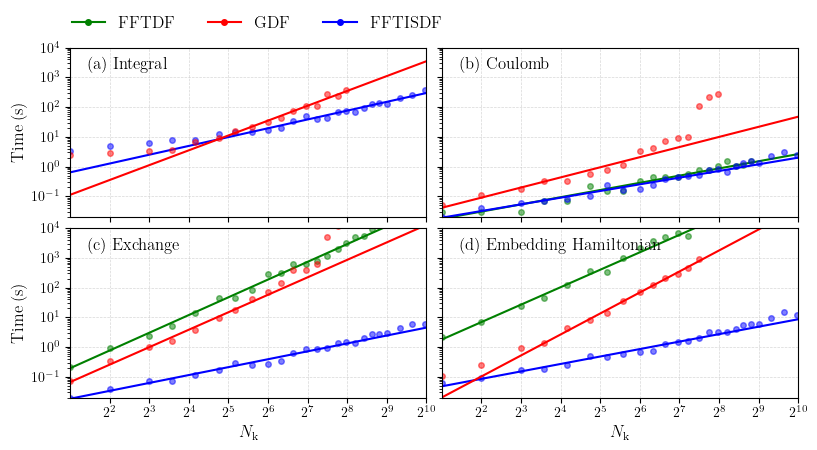

In [554]:
method = ["fftdf-80", "fftisdf-60-14", "gdf-2.0"]
title = ["time_build_df", "time_get_j", "time_get_k", "time_get_eri"]

style_line = {
    "marker": "",
    "linestyle": "-",
    "markersize": 4,
    "alpha": 0.5,
}

style_circle = {
    "marker": "o",
    "linestyle": "",
    "markersize": 4,
    "alpha": 0.5,
}

title_full = {
    "time_build_df": "Integral",
    "time_get_j": "Coulomb",
    "time_get_k": "Exchange",
    "time_get_eri": "Embedding Hamiltonian",
}

def gen_style(m, is_line):
    m = m.split('-')[0].upper()
    assert m in ['FFTISDF', 'GDF', 'RSDF', 'FFTDF']
    color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

    d = {
        "marker": "o",
        "linestyle": "",
        "markersize": 4,
        "alpha": 0.5,
        "color": color[m],
    }
    if is_line:
        d["marker"] = ""
        d["linestyle"] = "-"
        d["alpha"] = 1.0
    return d

fig, axs = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)
axs = axs.flatten() # [[0, 1, 3, 2]]
fontsize = 12

for ax, t in zip(axs, title):
    col = data_diamond_dmet[t]
    ix = "abcde"[title.index(t)]
    ax.text(0.05, 0.9, "(%s) %s" % (ix, title_full[t]), transform=ax.transAxes, ha="left", va="center", fontsize=fontsize)
    
    for m in method:
        if "build_df" in t and "fftdf" in m:
            continue
        
        xy = data_diamond_dmet[data_diamond_dmet['method'] == m][['nkpt', t]]
        xy.sort_values(by='nkpt', inplace=True, ascending=True)
        xy.dropna(inplace=True)

        x = xy['nkpt']
        y = xy[t]

        log2x = np.log2(x)
        log2y = np.log2(y)

        r = np.polyfit(log2x[:-6], log2y[:-6], 1)
        if "build_df" in t:
            r = np.polyfit(log2x[6:], log2y[6:], 1)

        if "time_get_eri" in t and "gdf" in m:
            r = np.polyfit(log2x[-11:], log2y[-11:], 1)

        p = np.poly1d(r)
        xx = np.linspace(0.0, 10.0, 100)
        yy = p(xx)

        print(f"{m}: {r}")

        ax.semilogy(log2x, y, label=m, **gen_style(m, False))
        ax.semilogy(xx, 2 ** yy, label=m, **gen_style(m, True))


    ax.set_ylim(2e-2, 1e4)
    ax.set_xlim(1, 10)
    ax.grid(
        which="major",
        axis="both",
        linestyle="--",
        linewidth=0.5,
        alpha=0.5,
    )

    xx = np.linspace(2, 10, 9)
    ax.set_xticks(xx)
    ax.set_xticklabels([f"$2^{{{int(x):d}}}$" for x in xx])

    yy = np.linspace(-1, 4, 6)
    ax.set_yticks(10 ** yy)
    ax.set_yticklabels([f"$10^{{{int(y):d}}}$" for y in yy])

axs[0].set_ylabel("Time (s)", fontsize=fontsize)
axs[2].set_ylabel("Time (s)", fontsize=fontsize)
axs[2].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
axs[3].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)

s = gen_style("FFTDF", True); s["marker"] = "o"
l1 = axs[-1].plot([], [], label="FFTDF", **s)

s = gen_style("GDF", True); s["marker"] = "o"
l2 = axs[-1].plot([], [], label="GDF", **s)

s = gen_style("FFTISDF", True); s["marker"] = "o"
l3 = axs[-1].plot([], [], label="FFTISDF", **s)

fig.legend(
    [l1[0], l2[0], l3[0]],
    ["FFTDF", "GDF", "FFTISDF"],
    fontsize=fontsize,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.06, 1.10),
    ncol=3,
)

fig.tight_layout(
    pad=0.1,
)

fig.savefig(figpath / "diamond-krhf-dmet-time.pdf", bbox_inches="tight", dpi=300)